# Imports

In [20]:
import pandas as pd
import numpy as np
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [21]:
df = pd.read_csv("ofertas_relampago.csv", encoding='latin-1')

In [22]:
df

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,15,9,16.28,6.0,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
48742,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS
48743,2021-06-19,2021-06-19 07:00:00+00:00,2021-06-19 13:00:03+00:00,lightning_deal,5,3,16.62,2.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS
48744,2021-06-19,2021-06-19 13:00:00+00:00,2021-06-19 19:00:00+00:00,lightning_deal,5,1,38.79,4.0,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS


## Data Modification

In [23]:
df = df.dropna(subset = ['SOLD_AMOUNT', 'SOLD_QUANTITY'])

In [60]:
df['ORIGIN'] = df['ORIGIN'].fillna('None')
df['SHIPPING_PAYMENT_TYPE'] = df['SHIPPING_PAYMENT_TYPE'].fillna('None')

C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\325167121.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ORIGIN'] = df['ORIGIN'].fillna('None')
C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\325167121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SHIPPING_PAYMENT_TYPE'] = df['SHIPPING_PAYMENT_TYPE'].fillna('None')


## Data Analysis

In [61]:
df.describe()

,OFFER_START_DATE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,OFFER_START_DATE_DAYWEEK,OFFER_START_DATE_DAY,OFFER_START_DATE_MONTH,OFFER_START_DATE_YEAR,OFFER_START_DTTM_DAYWEEK,...,OFFER_START_DTTM_MONTH,OFFER_START_DTTM_YEAR,OFFER_START_DTTM_HOUR,OFFER_START_DTTM_MINUTE,OFFER_FINISH_DTTM_DAYWEEK,OFFER_FINISH_DTTM_DAY,OFFER_FINISH_DTTM_MONTH,OFFER_FINISH_DTTM_YEAR,OFFER_FINISH_DTTM_HOUR,OFFER_FINISH_DTTM_MINUTE
count,24579,24579.000000,24579.000000,24579.000000,24579.000000,24579.000000,24579.000000,24579.000000,24579.0,24579.000000,...,24579.000000,24579.0,24579.000000,24579.0,24579.000000,24579.000000,24579.000000,24579.0,24579.000000,24579.000000
mean,2021-07-05 23:22:12.698644992,53.663819,44.975019,51.208898,10.851052,2.935148,16.873306,6.636682,2021.0,2.941942,...,6.636682,2021.0,7.531633,0.0,2.935229,16.873388,6.636682,2021.0,13.355832,5.625290
min,2021-06-01 00:00:00,1.000000,-192.000000,0.280000,1.000000,0.000000,1.000000,6.000000,2021.0,0.000000,...,6.000000,2021.0,0.000000,0.0,0.000000,1.000000,6.000000,2021.0,1.000000,0.000000
25%,2021-06-23 00:00:00,5.000000,3.000000,5.730000,1.000000,1.000000,9.000000,6.000000,2021.0,1.000000,...,6.000000,2021.0,5.000000,0.0,1.000000,9.000000,6.000000,2021.0,10.000000,0.000000
50%,2021-07-08 00:00:00,15.000000,7.000000,12.420000,3.000000,3.000000,17.000000,7.000000,2021.0,3.000000,...,7.000000,2021.0,7.000000,0.0,3.000000,17.000000,7.000000,2021.0,13.000000,0.000000
75%,2021-07-21 00:00:00,15.000000,14.000000,30.925000,6.000000,5.000000,25.000000,7.000000,2021.0,5.000000,...,7.000000,2021.0,13.000000,0.0,5.000000,25.000000,7.000000,2021.0,18.000000,0.000000
max,2021-07-31 00:00:00,9000.000000,8635.000000,4836.570000,1646.000000,6.000000,31.000000,7.000000,2021.0,6.000000,...,7.000000,2021.0,21.000000,0.0,6.000000,31.000000,7.000000,2021.0,23.000000,59.000000
std,NaN,286.399511,271.239790,175.254414,45.475305,1.930738,8.962198,0.480965,0.0,1.930965,...,0.480965,0.0,4.428435,0.0,1.930720,8.962240,0.480965,0.0,4.525422,13.887132


In [62]:
df.isna().sum()

OFFER_START_DATE             0
OFFER_START_DTTM             0
OFFER_FINISH_DTTM            0
OFFER_TYPE                   0
INVOLVED_STOCK               0
REMAINING_STOCK_AFTER_END    0
SOLD_AMOUNT                  0
SOLD_QUANTITY                0
ORIGIN                       0
SHIPPING_PAYMENT_TYPE        0
DOM_DOMAIN_AGG1              0
VERTICAL                     0
DOMAIN_ID                    0
OFFER_START_DATE_DAYWEEK     0
OFFER_START_DATE_DAY         0
OFFER_START_DATE_MONTH       0
OFFER_START_DATE_YEAR        0
OFFER_START_DTTM_DAYWEEK     0
OFFER_START_DTTM_DAY         0
OFFER_START_DTTM_MONTH       0
OFFER_START_DTTM_YEAR        0
OFFER_START_DTTM_HOUR        0
OFFER_START_DTTM_MINUTE      0
OFFER_FINISH_DTTM_DAYWEEK    0
OFFER_FINISH_DTTM_DAY        0
OFFER_FINISH_DTTM_MONTH      0
OFFER_FINISH_DTTM_YEAR       0
OFFER_FINISH_DTTM_HOUR       0
OFFER_FINISH_DTTM_MINUTE     0
dtype: int64

## Feature Engineering

In [63]:
df['OFFER_START_DTTM'] = df['OFFER_START_DTTM'].astype('string')
df['OFFER_FINISH_DTTM'] = df['OFFER_FINISH_DTTM'].astype('string')

C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\1082021715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_START_DTTM'] = df['OFFER_START_DTTM'].astype('string')
C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\1082021715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_FINISH_DTTM'] = df['OFFER_FINISH_DTTM'].astype('string')


In [64]:
df['OFFER_START_DTTM'] = df['OFFER_START_DTTM'].str.replace('+00:00',' ')
df['OFFER_FINISH_DTTM'] = df['OFFER_FINISH_DTTM'].str.replace('+00:00',' ')

C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\88325756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_START_DTTM'] = df['OFFER_START_DTTM'].str.replace('+00:00',' ')
C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\88325756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_FINISH_DTTM'] = df['OFFER_FINISH_DTTM'].str.replace('+00:00',' ')


In [65]:
df['OFFER_START_DATE'] = pd.to_datetime(df['OFFER_START_DATE'])
df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
df['OFFER_FINISH_DTTM'] = pd.to_datetime(df['OFFER_FINISH_DTTM'])

C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\189039690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_START_DATE'] = pd.to_datetime(df['OFFER_START_DATE'])
C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\189039690.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_START_DTTM'] = pd.to_datetime(df['OFFER_START_DTTM'])
C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\189039690.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [66]:
df['OFFER_START_DTTM'] = df['OFFER_START_DTTM'] - timedelta(hours=6)
df['OFFER_FINISH_DTTM'] =df['OFFER_FINISH_DTTM'] - timedelta(hours=6)

C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\4149515964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_START_DTTM'] = df['OFFER_START_DTTM'] - timedelta(hours=6)
C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\4149515964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_FINISH_DTTM'] =df['OFFER_FINISH_DTTM'] - timedelta(hours=6)


In [67]:
df['OFFER_START_DATE_DAYWEEK'] = df['OFFER_START_DATE'].dt.dayofweek
df['OFFER_START_DATE_DAY'] = df['OFFER_START_DATE'].dt.day
df['OFFER_START_DATE_MONTH'] = df['OFFER_START_DATE'].dt.month
df['OFFER_START_DATE_YEAR'] = df['OFFER_START_DATE'].dt.year

C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\3534356201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_START_DATE_DAYWEEK'] = df['OFFER_START_DATE'].dt.dayofweek
C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\3534356201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_START_DATE_DAY'] = df['OFFER_START_DATE'].dt.day
C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\3534356201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [68]:
df['OFFER_START_DTTM_DAYWEEK'] = df['OFFER_START_DTTM'].dt.dayofweek
df['OFFER_START_DTTM_DAY'] = df['OFFER_START_DTTM'].dt.day
df['OFFER_START_DTTM_MONTH'] = df['OFFER_START_DTTM'].dt.month
df['OFFER_START_DTTM_YEAR'] = df['OFFER_START_DTTM'].dt.year
df['OFFER_START_DTTM_HOUR'] = df['OFFER_START_DTTM'].dt.hour
df['OFFER_START_DTTM_MINUTE'] = df['OFFER_START_DTTM'].dt.minute

C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\2951996203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_START_DTTM_DAYWEEK'] = df['OFFER_START_DTTM'].dt.dayofweek
C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\2951996203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_START_DTTM_DAY'] = df['OFFER_START_DTTM'].dt.day
C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\2951996203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [69]:
df['OFFER_FINISH_DTTM_DAYWEEK'] = df['OFFER_FINISH_DTTM'].dt.dayofweek
df['OFFER_FINISH_DTTM_DAY'] = df['OFFER_FINISH_DTTM'].dt.day
df['OFFER_FINISH_DTTM_MONTH'] = df['OFFER_FINISH_DTTM'].dt.month
df['OFFER_FINISH_DTTM_YEAR'] = df['OFFER_FINISH_DTTM'].dt.year
df['OFFER_FINISH_DTTM_HOUR'] = df['OFFER_FINISH_DTTM'].dt.hour
df['OFFER_FINISH_DTTM_MINUTE'] = df['OFFER_FINISH_DTTM'].dt.minute

C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\4125218865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_FINISH_DTTM_DAYWEEK'] = df['OFFER_FINISH_DTTM'].dt.dayofweek
C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\4125218865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_FINISH_DTTM_DAY'] = df['OFFER_FINISH_DTTM'].dt.day
C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\4125218865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [88]:
df['OFFER_DIFF'] = df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']

C:\Users\flavi\AppData\Local\Temp\ipykernel_32484\3341870206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OFFER_DIFF'] = df['OFFER_FINISH_DTTM'] - df['OFFER_START_DTTM']


In [89]:
df

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,...,OFFER_START_DTTM_YEAR,OFFER_START_DTTM_HOUR,OFFER_START_DTTM_MINUTE,OFFER_FINISH_DTTM_DAYWEEK,OFFER_FINISH_DTTM_DAY,OFFER_FINISH_DTTM_MONTH,OFFER_FINISH_DTTM_YEAR,OFFER_FINISH_DTTM_HOUR,OFFER_FINISH_DTTM_MINUTE,OFFER_DIFF
0,2021-06-22,2021-06-22 04:00:00,2021-06-22 11:02:43,lightning_deal,4,-2,4.72,6.0,A,none,...,2021,4,0,1,22,6,2021,11,2,0 days 07:02:43
2,2021-06-22,2021-06-21 19:00:00,2021-06-22 01:00:01,lightning_deal,15,12,10.73,3.0,None,none,...,2021,19,0,1,22,6,2021,1,0,0 days 06:00:01
3,2021-06-22,2021-06-22 07:00:00,2021-06-22 13:36:12,lightning_deal,15,13,7.03,2.0,None,none,...,2021,7,0,1,22,6,2021,13,36,0 days 06:36:12
4,2021-06-22,2021-06-22 01:00:00,2021-06-22 03:48:12,lightning_deal,15,0,39.65,15.0,None,none,...,2021,1,0,1,22,6,2021,3,48,0 days 02:48:12
7,2021-06-22,2021-06-22 07:00:00,2021-06-22 11:05:39,lightning_deal,10,-1,103.03,11.0,None,free_shipping,...,2021,7,0,1,22,6,2021,11,5,0 days 04:05:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48737,2021-06-19,2021-06-19 03:00:00,2021-06-19 11:00:00,lightning_deal,10,7,33.97,3.0,A,free_shipping,...,2021,3,0,5,19,6,2021,11,0,0 days 08:00:00
48740,2021-06-19,2021-06-18 19:00:00,2021-06-19 01:00:02,lightning_deal,15,15,21.23,2.0,None,free_shipping,...,2021,19,0,5,19,6,2021,1,0,0 days 06:00:02
48741,2021-06-19,2021-06-19 01:00:00,2021-06-19 07:00:01,lightning_deal,15,9,16.28,6.0,None,none,...,2021,1,0,5,19,6,2021,7,0,0 days 06:00:01
48743,2021-06-19,2021-06-18 19:00:00,2021-06-19 01:00:03,lightning_deal,5,3,16.62,2.0,None,free_shipping,...,2021,19,0,5,19,6,2021,1,0,0 days 06:00:03


In [90]:
df.describe()

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,OFFER_START_DATE_DAYWEEK,OFFER_START_DATE_DAY,OFFER_START_DATE_MONTH,...,OFFER_START_DTTM_YEAR,OFFER_START_DTTM_HOUR,OFFER_START_DTTM_MINUTE,OFFER_FINISH_DTTM_DAYWEEK,OFFER_FINISH_DTTM_DAY,OFFER_FINISH_DTTM_MONTH,OFFER_FINISH_DTTM_YEAR,OFFER_FINISH_DTTM_HOUR,OFFER_FINISH_DTTM_MINUTE,OFFER_DIFF
count,24579,24579,24579,24579.000000,24579.000000,24579.000000,24579.000000,24579.000000,24579.000000,24579.000000,...,24579.0,24579.000000,24579.0,24579.000000,24579.000000,24579.000000,24579.0,24579.000000,24579.000000,24579
mean,2021-07-05 23:22:12.698644992,2021-07-06 00:52:24.635664128,2021-07-06 06:49:27.084625152,53.663819,44.975019,51.208898,10.851052,2.935148,16.873306,6.636682,...,2021.0,7.726189,0.0,2.938118,16.857317,6.636519,2021.0,7.860653,5.625290,0 days 05:57:02.448960494
min,2021-06-01 00:00:00,2021-05-31 19:00:00,2021-05-31 22:10:53,1.000000,-192.000000,0.280000,1.000000,0.000000,1.000000,6.000000,...,2021.0,0.000000,0.0,0.000000,1.000000,5.000000,2021.0,0.000000,0.000000,0 days 00:05:26
25%,2021-06-23 00:00:00,2021-06-22 19:00:00,2021-06-23 01:00:00,5.000000,3.000000,5.730000,1.000000,1.000000,9.000000,6.000000,...,2021.0,1.000000,0.0,1.000000,9.000000,6.000000,2021.0,5.000000,0.000000,0 days 06:00:00
50%,2021-07-08 00:00:00,2021-07-07 23:00:00,2021-07-08 04:46:36,15.000000,7.000000,12.420000,3.000000,3.000000,17.000000,7.000000,...,2021.0,7.000000,0.0,3.000000,17.000000,7.000000,2021.0,7.000000,0.000000,0 days 06:00:02
75%,2021-07-21 00:00:00,2021-07-21 07:00:00,2021-07-21 10:38:06,15.000000,14.000000,30.925000,6.000000,5.000000,25.000000,7.000000,...,2021.0,19.000000,0.0,5.000000,25.000000,7.000000,2021.0,13.000000,0.000000,0 days 06:00:07
max,2021-07-31 00:00:00,2021-07-31 07:00:00,2021-07-31 13:00:34,9000.000000,8635.000000,4836.570000,1646.000000,6.000000,31.000000,7.000000,...,2021.0,23.000000,0.0,6.000000,31.000000,7.000000,2021.0,23.000000,59.000000,0 days 14:40:07
std,NaN,NaN,NaN,286.399511,271.239790,175.254414,45.475305,1.930738,8.962198,0.480965,...,0.0,7.413244,0.0,1.931857,8.962360,0.481181,0.0,4.812075,13.887132,0 days 01:24:40.489158474


In [72]:
df.dtypes

OFFER_START_DATE             datetime64[ns]
OFFER_START_DTTM             datetime64[ns]
OFFER_FINISH_DTTM            datetime64[ns]
OFFER_TYPE                           object
INVOLVED_STOCK                        int64
REMAINING_STOCK_AFTER_END             int64
SOLD_AMOUNT                         float64
SOLD_QUANTITY                       float64
ORIGIN                               object
SHIPPING_PAYMENT_TYPE                object
DOM_DOMAIN_AGG1                      object
VERTICAL                             object
DOMAIN_ID                            object
OFFER_START_DATE_DAYWEEK              int32
OFFER_START_DATE_DAY                  int32
OFFER_START_DATE_MONTH                int32
OFFER_START_DATE_YEAR                 int32
OFFER_START_DTTM_DAYWEEK              int32
OFFER_START_DTTM_DAY                  int32
OFFER_START_DTTM_MONTH                int32
OFFER_START_DTTM_YEAR                 int32
OFFER_START_DTTM_HOUR                 int32
OFFER_START_DTTM_MINUTE         

In [73]:
df.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'OFFER_START_DATE_DAYWEEK',
       'OFFER_START_DATE_DAY', 'OFFER_START_DATE_MONTH',
       'OFFER_START_DATE_YEAR', 'OFFER_START_DTTM_DAYWEEK',
       'OFFER_START_DTTM_DAY', 'OFFER_START_DTTM_MONTH',
       'OFFER_START_DTTM_YEAR', 'OFFER_START_DTTM_HOUR',
       'OFFER_START_DTTM_MINUTE', 'OFFER_FINISH_DTTM_DAYWEEK',
       'OFFER_FINISH_DTTM_DAY', 'OFFER_FINISH_DTTM_MONTH',
       'OFFER_FINISH_DTTM_YEAR', 'OFFER_FINISH_DTTM_HOUR',
       'OFFER_FINISH_DTTM_MINUTE'],
      dtype='object')

# Charts and Analysis

In [74]:
x = ['OFFER_TYPE','ORIGIN', 'SHIPPING_PAYMENT_TYPE','DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']
for i in x:
    print(i,'\n')
    print(df[i].drop_duplicates())
    print('\n')

OFFER_TYPE 

0    lightning_deal
Name: OFFER_TYPE, dtype: object


ORIGIN 

0       A
2    None
Name: ORIGIN, dtype: object


SHIPPING_PAYMENT_TYPE 

0             none
7    free_shipping
Name: SHIPPING_PAYMENT_TYPE, dtype: object


DOM_DOMAIN_AGG1 

0                          PETS FOOD
2                          COMPUTERS
9                        ELECTRONICS
17                           APPAREL
19                    TOYS AND GAMES
21                     PERSONAL CARE
26            TOOLS AND CONSTRUCTION
29                        HOME&DECOR
38                            SPORTS
67      BOOKS, MULTIMEDIA & OTHER E!
109                     PET PRODUCTS
112                        AUTOPARTS
136                         FOOTWEAR
175                 BEAUTY EQUIPMENT
179                           MOBILE
189                            FOODS
214               APPAREL ACCESORIES
257                            PARTY
264                       STATIONARY
325                 PERSONAL HYGIENE
362      

In [75]:
x = ['OFFER_TYPE','ORIGIN', 'SHIPPING_PAYMENT_TYPE','DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']
for i in x:
    print(i,'\n')
    print(df.groupby(i)[i].count().sort_values(ascending=False))
    print('\n')

OFFER_TYPE 

OFFER_TYPE
lightning_deal    24579
Name: OFFER_TYPE, dtype: int64


ORIGIN 

ORIGIN
None    19371
A        5208
Name: ORIGIN, dtype: int64


SHIPPING_PAYMENT_TYPE 

SHIPPING_PAYMENT_TYPE
none             12845
free_shipping    11734
Name: SHIPPING_PAYMENT_TYPE, dtype: int64


DOM_DOMAIN_AGG1 

DOM_DOMAIN_AGG1
HOME&DECOR                      3410
PHARMACEUTICS                   2204
COMPUTERS                       2118
APPAREL ACCESORIES              2107
APPAREL                         1985
SPORTS                          1700
PERSONAL CARE                   1533
ELECTRONICS                     1369
MOBILE                          1042
AUTOPARTS                        902
FOOTWEAR                         741
BEAUTY EQUIPMENT                 691
TOOLS AND CONSTRUCTION           681
STATIONARY                       576
INDUSTRY                         521
TOYS AND GAMES                   451
PERSONAL HYGIENE                 351
FOODS                            342
MOTOPARTS 

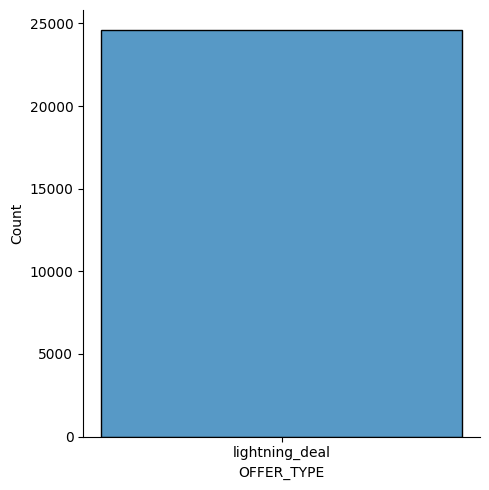

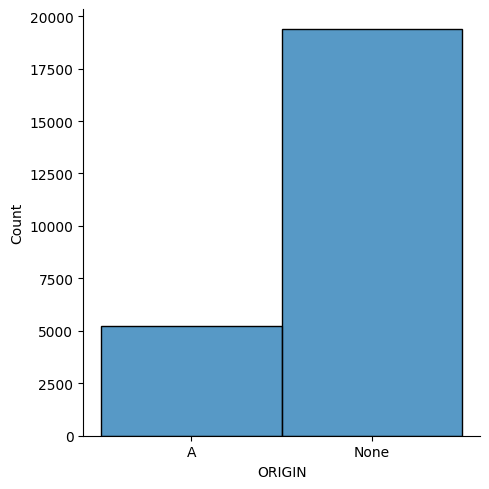

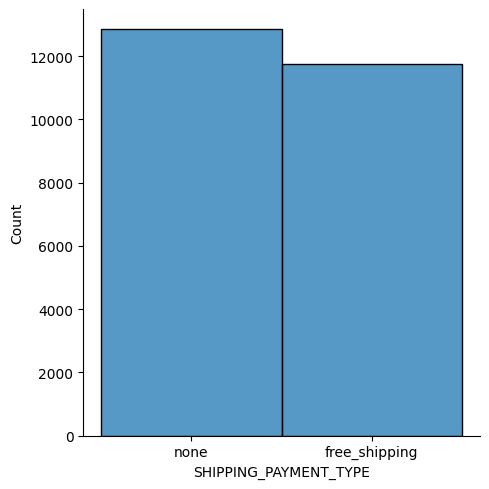

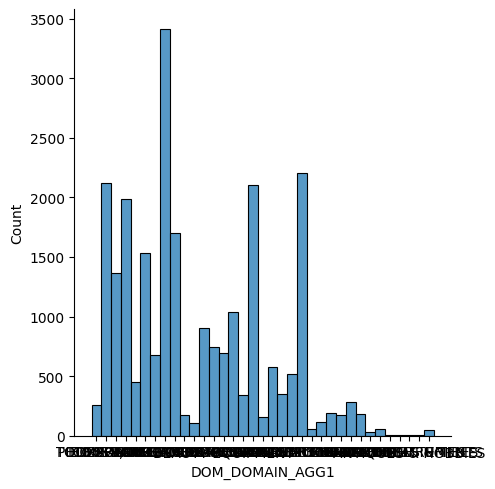

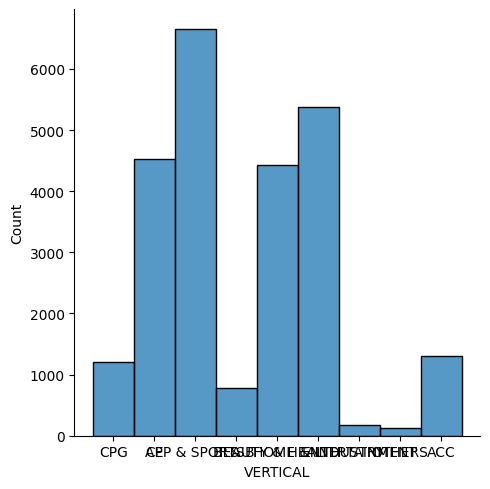

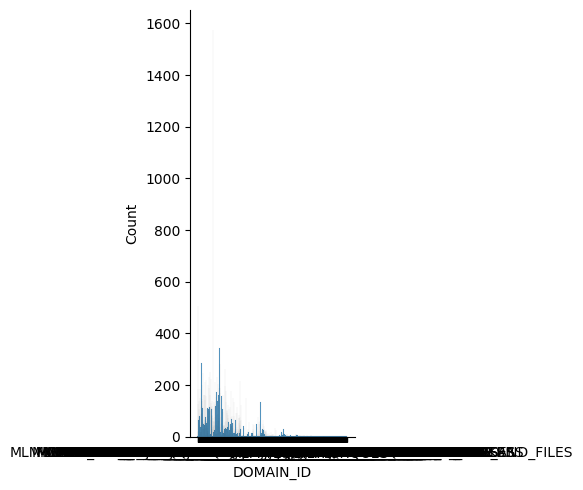

In [76]:
x = ['OFFER_TYPE','ORIGIN', 'SHIPPING_PAYMENT_TYPE','DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']
for i in x:
    sns.displot(df, x=i)

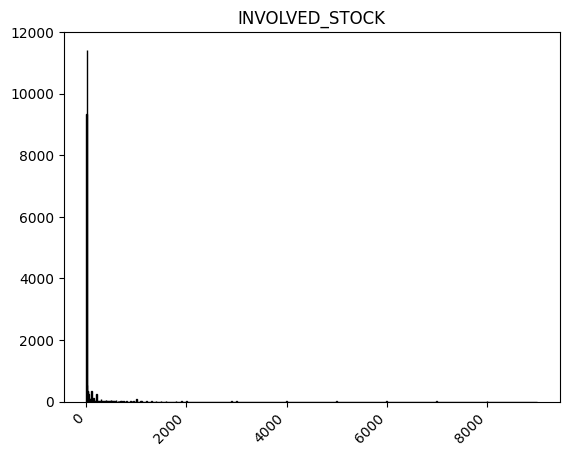

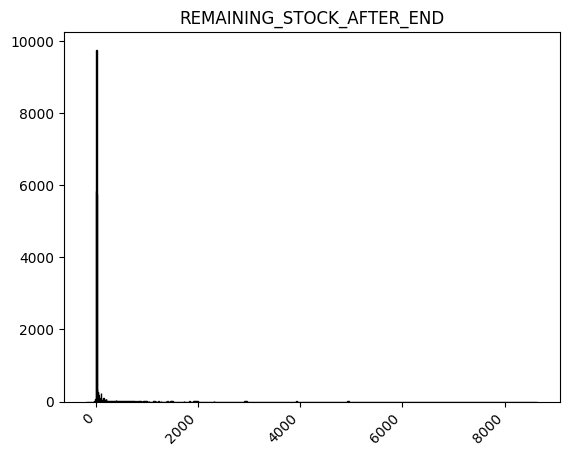

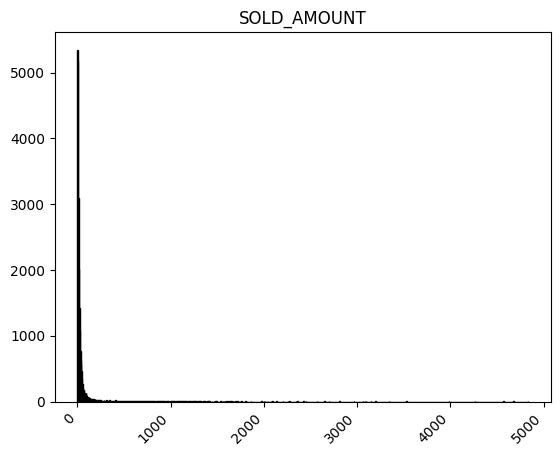

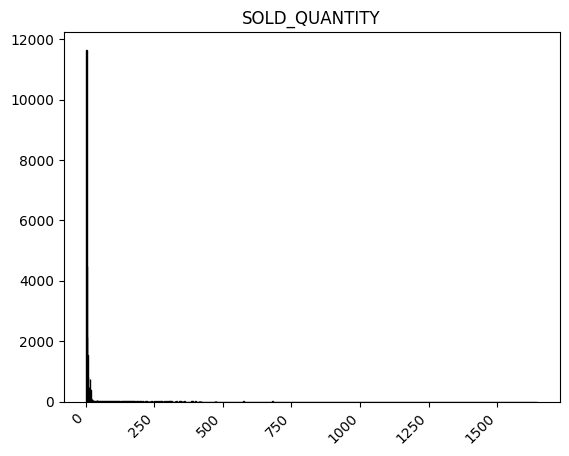

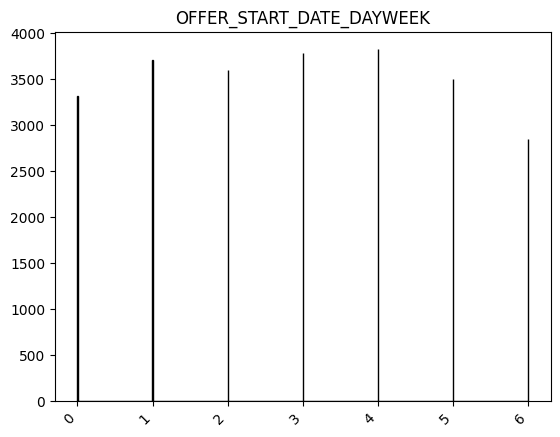

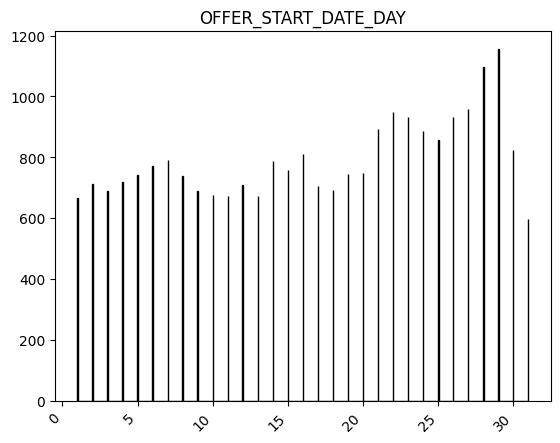

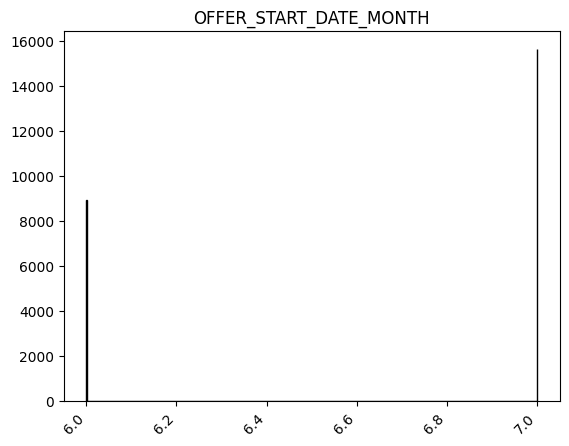

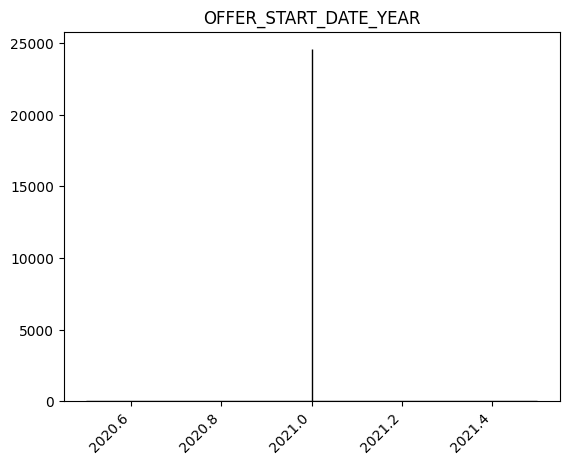

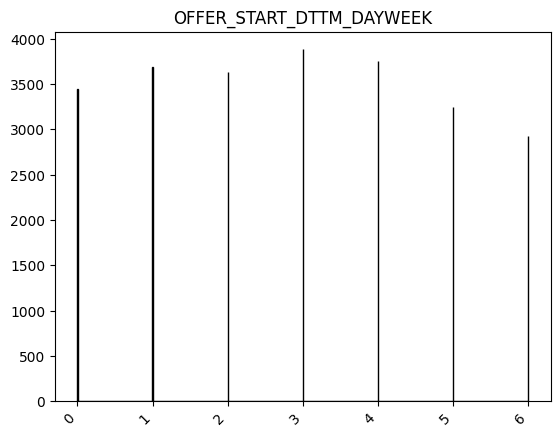

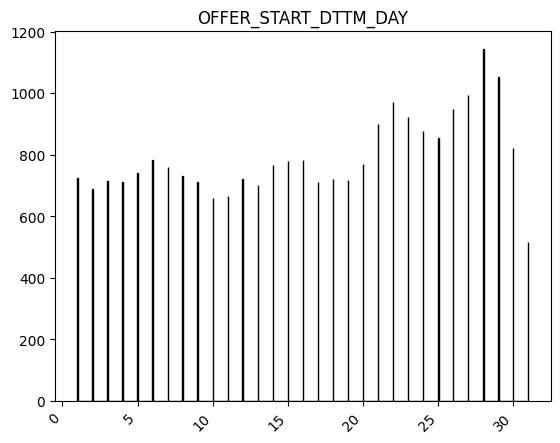

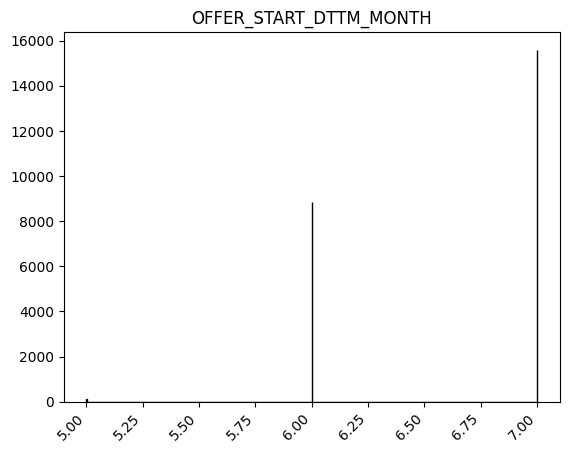

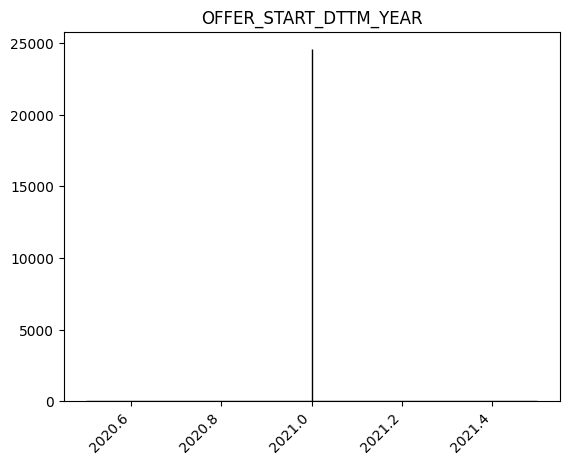

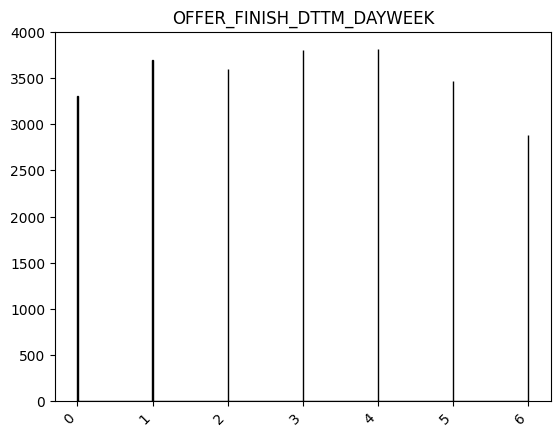

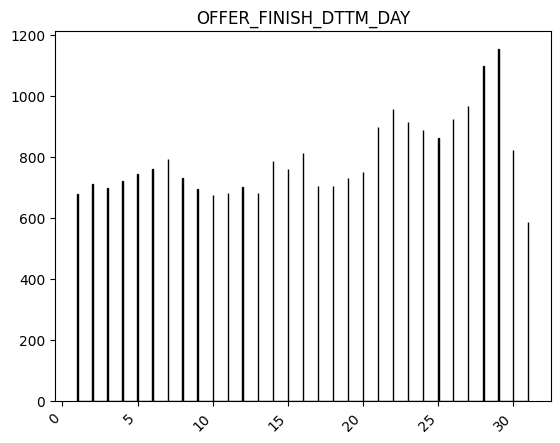

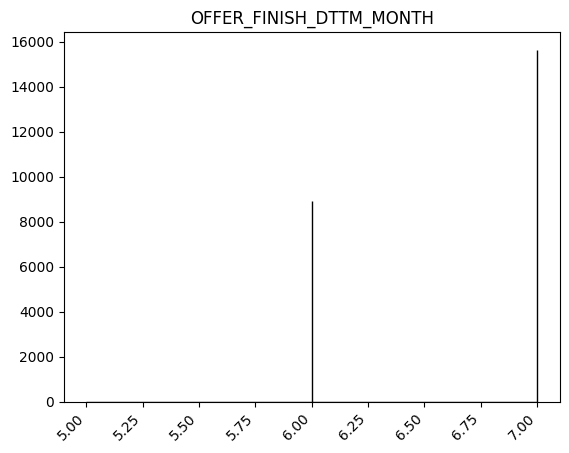

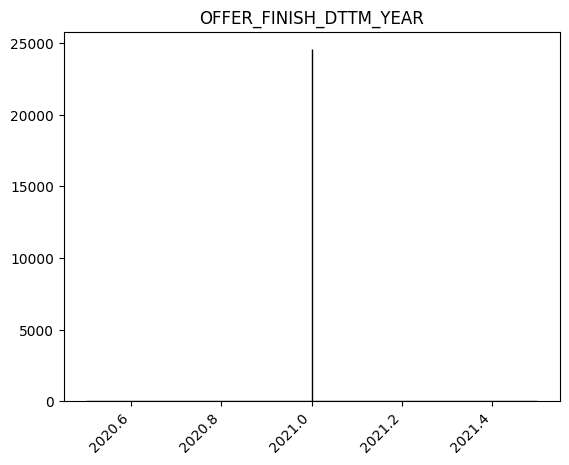

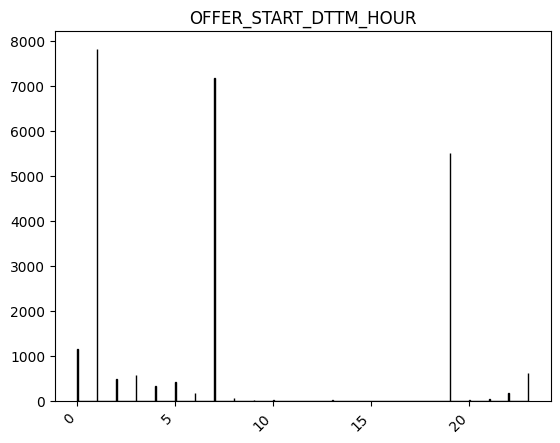

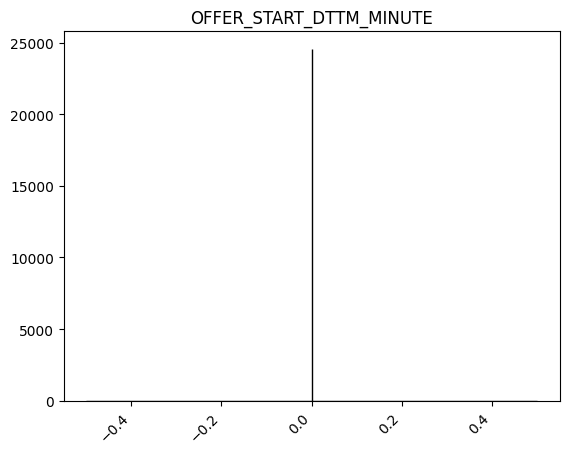

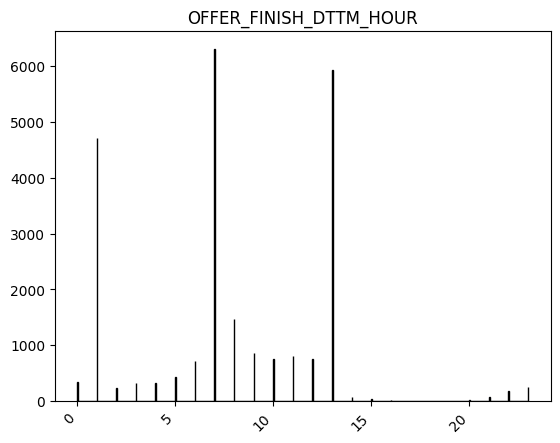

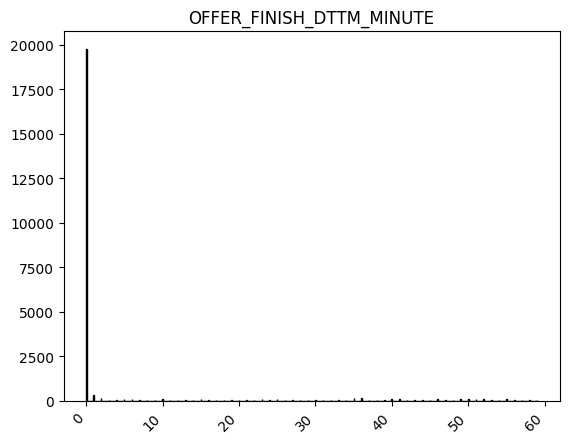

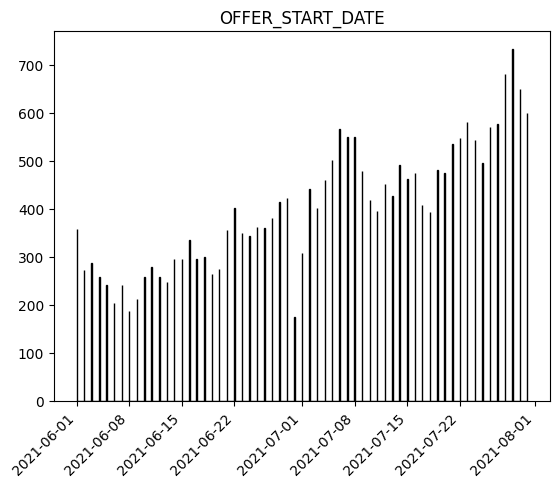

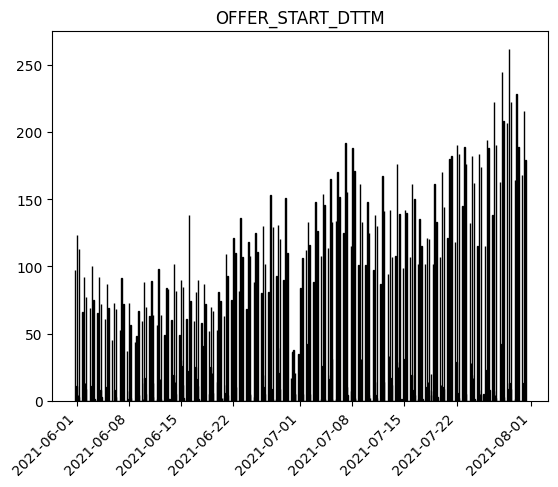

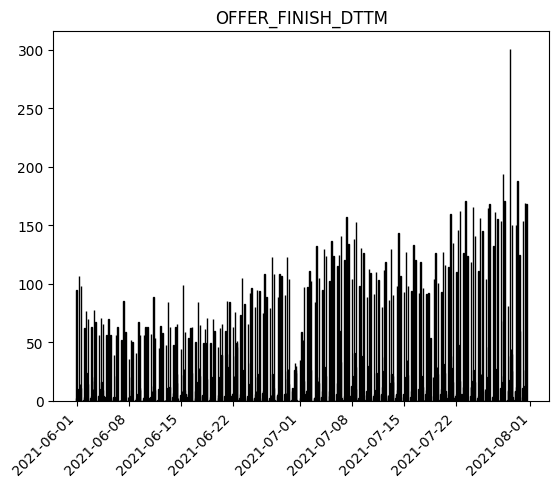

In [77]:
x = ['INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY','OFFER_START_DATE_DAYWEEK',
       'OFFER_START_DATE_DAY', 'OFFER_START_DATE_MONTH',
       'OFFER_START_DATE_YEAR', 'OFFER_START_DTTM_DAYWEEK',
       'OFFER_START_DTTM_DAY', 'OFFER_START_DTTM_MONTH',
       'OFFER_START_DTTM_YEAR', 'OFFER_FINISH_DTTM_DAYWEEK',
       'OFFER_FINISH_DTTM_DAY', 'OFFER_FINISH_DTTM_MONTH',
       'OFFER_FINISH_DTTM_YEAR', 'OFFER_START_DTTM_HOUR',
       'OFFER_START_DTTM_MINUTE', 'OFFER_FINISH_DTTM_HOUR',
       'OFFER_FINISH_DTTM_MINUTE','OFFER_START_DATE','OFFER_START_DTTM','OFFER_FINISH_DTTM' ]
for i in x:
    plt.title(i)
    plt.hist(df[i], color = 'blue', edgecolor = 'black',bins = 1000)
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [80]:
x = ['OFFER_TYPE','ORIGIN', 'SHIPPING_PAYMENT_TYPE','DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']
for i in x:
    print(df.groupby(i)['SOLD_AMOUNT'].sum().sort_values(ascending=False))
    print('\n')

OFFER_TYPE
lightning_deal    1258663.5
Name: SOLD_AMOUNT, dtype: float64


ORIGIN
A       838478.52
None    420184.98
Name: SOLD_AMOUNT, dtype: float64


SHIPPING_PAYMENT_TYPE
free_shipping    748536.12
none             510127.38
Name: SOLD_AMOUNT, dtype: float64


DOM_DOMAIN_AGG1
PHARMACEUTICS                   440216.74
MOBILE                          158992.21
ELECTRONICS                     119853.95
BEAUTY EQUIPMENT                 88830.25
HOME&DECOR                       87761.65
COMPUTERS                        83941.78
APPAREL                          36569.90
APPAREL ACCESORIES               36565.63
SPORTS                           33118.70
INDUSTRY                         25874.22
TOOLS AND CONSTRUCTION           23977.70
FOOTWEAR                         20685.71
PERSONAL CARE                    18380.28
AUTOPARTS                        14905.65
SECURITY                         10789.33
TOYS AND GAMES                    8171.46
STATIONARY                        7115.78
MOTO

In [81]:
x = ['OFFER_TYPE','ORIGIN', 'SHIPPING_PAYMENT_TYPE','DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']
for i in x:
    print(df.groupby(i)['SOLD_QUANTITY'].sum().sort_values(ascending=False))
    print('\n')

OFFER_TYPE
lightning_deal    266708.0
Name: SOLD_QUANTITY, dtype: float64


ORIGIN
A       187970.0
None     78738.0
Name: SOLD_QUANTITY, dtype: float64


SHIPPING_PAYMENT_TYPE
none             202361.0
free_shipping     64347.0
Name: SOLD_QUANTITY, dtype: float64


DOM_DOMAIN_AGG1
PHARMACEUTICS                   147697.0
BEAUTY EQUIPMENT                 24300.0
HOME&DECOR                       18269.0
COMPUTERS                        11165.0
APPAREL                           7845.0
APPAREL ACCESORIES                7654.0
SPORTS                            7626.0
PERSONAL CARE                     6144.0
MOBILE                            5511.0
ELECTRONICS                       5157.0
AUTOPARTS                         3866.0
INDUSTRY                          2831.0
TOOLS AND CONSTRUCTION            2740.0
STATIONARY                        2178.0
FOOTWEAR                          2120.0
PERSONAL HYGIENE                  1508.0
PETS FOOD                         1451.0
TOYS AND GAMES      

In [87]:
x = ['OFFER_TYPE','ORIGIN', 'SHIPPING_PAYMENT_TYPE','DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID']
for i in x:
    dfx = df.groupby(i)['SOLD_AMOUNT'].sum() / df.groupby(i)['SOLD_QUANTITY'].sum()
    print(dfx.sort_values(ascending=False))
    print('\n')

OFFER_TYPE
lightning_deal    4.719257
dtype: float64


ORIGIN
None    5.336495
A       4.460704
dtype: float64


SHIPPING_PAYMENT_TYPE
free_shipping    11.632805
none              2.520878
dtype: float64


DOM_DOMAIN_AGG1
WHEELS & TIRES                  35.985357
MOBILE                          28.849975
ELECTRONICS                     23.241022
MUSICAL INSTRUMENTS             14.607647
VEHICULAR MULTIMEDIA            14.390937
ANTIQUES & HOBBIES              11.380000
BABY                            11.039752
SUPLEMENTS                      10.076077
FOOTWEAR                         9.757410
SECURITY                         9.439484
INDUSTRY                         9.139604
TOOLS AND CONSTRUCTION           8.750985
COMPUTERS                        7.518296
MOTOPARTS                        7.191333
ACC TOOLS                        5.774912
TOYS AND GAMES                   5.662827
PET PRODUCTS                     5.329175
BOOKS, MULTIMEDIA & OTHER E!     5.118353
HOME&DECOR            

In [83]:
df.groupby('OFFER_FINISH_DTTM_MINUTE')['OFFER_FINISH_DTTM_MINUTE'].count().sort_values(ascending=False)

OFFER_FINISH_DTTM_MINUTE
0     19767
1       332
2       176
35      157
36      144
50      122
55      117
40      113
10       96
15       89
51       86
46       86
6        85
25       84
41       82
5        82
52       80
23       80
49       80
54       79
48       79
32       78
20       76
38       75
21       74
17       74
31       73
42       72
33       72
26       72
56       72
39       71
53       71
59       71
24       71
28       70
8        70
18       70
45       70
30       69
16       69
29       69
11       66
12       66
43       65
9        64
47       62
44       62
34       60
7        59
3        59
14       57
13       57
19       57
27       56
37       56
58       56
57       55
22       52
4        45
Name: OFFER_FINISH_DTTM_MINUTE, dtype: int64

In [94]:
df.groupby('SOLD_AMOUNT')['SOLD_AMOUNT'].count().sort_values(ascending=False).head(30)

SOLD_AMOUNT
4.25     39
2.89     31
5.71     30
2.55     29
5.75     29
5.68     29
8.54     28
2.68     28
3.85     28
2.82     27
4.48     27
2.54     27
3.82     27
3.83     26
2.39     25
5.11     25
2.85     24
2.41     24
2.61     24
8.36     24
11.39    24
2.25     24
3.19     23
4.49     23
4.24     23
3.90     23
2.69     23
2.24     23
4.99     22
6.34     22
Name: SOLD_AMOUNT, dtype: int64

In [95]:
df.groupby('SOLD_QUANTITY')['SOLD_QUANTITY'].count().sort_values(ascending=False).head(30)

SOLD_QUANTITY
1.0     7450
2.0     4209
3.0     2547
5.0     2146
4.0     1928
6.0      961
15.0     758
7.0      584
8.0      476
10.0     370
9.0      351
11.0     246
16.0     241
14.0     229
12.0     224
13.0     190
17.0     129
18.0      86
20.0      50
19.0      41
21.0      37
22.0      34
26.0      31
40.0      31
23.0      26
24.0      26
25.0      24
27.0      21
28.0      20
35.0      16
Name: SOLD_QUANTITY, dtype: int64

# EDA

## Rentabilidade = preço / quantidade
### 1 - Os principais horários de início de promoções são às 01h, 07h e 19h
### 2 - Os principais horários de término de promoções são às 01h, 07h e 13h
### 3 - As promoções se iniciam mais nas quinta-feiras e menos aos domingos
### 4 - O tempo médio de promoções é de 5 horas e 57 minutos, porém com mediana em 6 horas
### 5 - O tempo máximo de promoções foi de 14 horas e 40 minutos e o menor de 5 minutos
### 6 - Aproximadamente 80% das promoções são finalizadas no ínicio da hora (no minuto 0)
### 7 - O DOM_DOMAIN_AGG mais vendido foi PHARMACEUTICS, seguido por BEAUTY EQUIPMENT e HOME&DECOR
### 8 - O DOM_DOMAIN_AGG mais valioso foi PHARMACEUTICS, seguido por MOBILE e ELECTRONICS
### 9 - DOMAIN_ID mais vendido e valioso foi o MLM-SURGICAL_AND_INDUSTRIAL_MASKS, porém o mais rentável foi o MLM-WASHING_MACHINES seguido por MLM-LIVING_ROOM_SETS
### 10 - Dos DOMAIN_ID mais vendidos, 4 estão influenciados diretamente pela pandemia, 1º MLM-SURGICAL_AND_INDUSTRIAL_MASKS, 2º MLM-DISPOSABLE_GLOVES, 3º MLM-OXIMETERS e 5º MLM-THERMOMETERS
### 11 - Os DOM_DOMAIN_AGG mais rentáveis são em 1º WHEELS & TIRES, 2º MOBILE e 3º ELECTRONICS
### 12 - O freeship teve menor quantidade de vendas, porém com um volume de dinheiro maior, reforçando que a partir de determinado valor, o frete é grátis
### 13 - Com base no jupyter anterior (Atividade 1 - Geral), 24167 promoções não tiveram vendas

# Insights

### 1 - A pandemia elevou as vendas dos produtos da classe PHARMACEUTICS com os MLM-SURGICAL_AND_INDUSTRIAL_MASKS, MLM-DISPOSABLE_GLOVES, MLM-OXIMETERS e MLM-THERMOMETERS
### 2 - Oferecer frete grátis tem uma maior quantidade de produtos rentáveis
### 3 - Raramente inicia-se uma promoção em hora útil (8h às 18h), sendo que o comerciante prefere iniciar ou antes do cliente sair de casa ou após o mesmo retornar para sua respectiva residência
## Com base no jupyter anterior (Atividade 1 - Geral)
### 4 - Nesse período o maior aproveitamento de promoções do DOM_DOMAIN_AGG foram de PHARMACEUTICS, BEAUTY EQUIPMENT, SUPLEMENTS e ANTIQUES & HOBBIES. Todos acima de 60% de aproveitamento de promoções, podendo criar um grupo separado para eles (Criando um banner de "saúde" na tela principal)
### 5 - O DOM_DOMAIN_AGG Agro só teve uma única promoção e mesmo assim não teve nenhuma venda